### Ho va ten : Nguyen Thanh Truc
### MSVV      : 20110342

In [1]:
import numpy as np
import cv2
import pandas as pd
import math as mb
import matplotlib.pyplot as plt

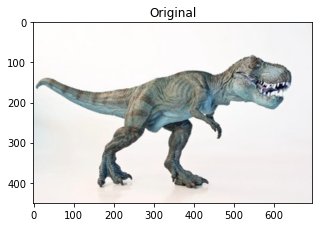

In [2]:
path = "D:/1111111111111111/302843992_485786496928626_6191234182030738228_n.png"
image = cv2.imread(path)
plt.figure( figsize=(5,5))
plt.title('Original')
plt.imshow(image)

In [3]:
def imshows(ImageData, LabelData, rows,cols,gridType = False):
    """
    Show images
        Parameters
        ----------
        ImageData: list images (type list)
        LabelData: list labels (type list)
        rows: int
        cols: int
    """
    #Convert ImageData and LabelData to List
    from matplotlib import pyplot as plt
    ImageArray = list(ImageData)
    LabelArray = list(LabelData)
    if (rows == 1 & cols == 1):
        fig = plt.figure(figsize=(10,10))
    else:
        fig = plt.figure(figsize=(cols*15,rows*10))
    for i in range(1, cols * rows + 1):
        plt.subplot(rows, cols, i)
        image = ImageArray[i-1]
        # if the ....
        # ohterwise, 
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
            plt.grid(gridType)
        else:
            plt.imshow(image)
            plt.grid(gridType)
        plt.title(LabelArray[i-1],fontsize=40)
        plt.axis("off")
    plt.show()


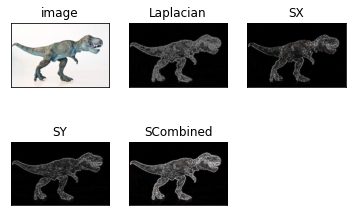

In [10]:
lap = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'SX', 'SY', 'SCombined']
images = [image, lap, sobelX, sobelY, sobelCombined]
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [12]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(image, (3,3), 0) 
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis 
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


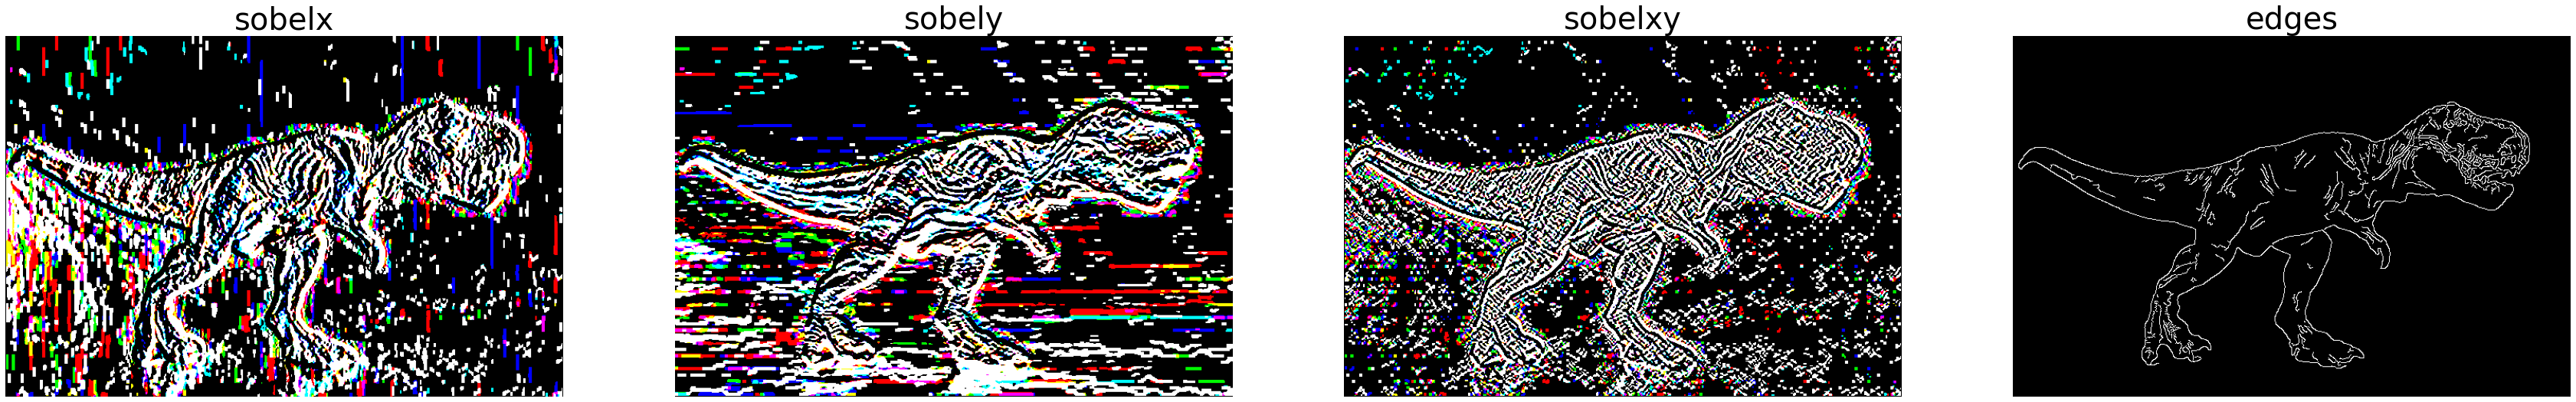

In [14]:
imshows([sobelx, sobely, sobelxy,edges], ["sobelx", "sobely", "sobelxy","edges"], 1,4)